In [2]:
pip install sounddevice


Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Working Fine with small input audio file


1. Record audio
2. Upload audio
3. Apply noise reduction
4.Plot spectrum 
5. Play original audio
6. Play filtered audio
7. Exit


Please load audio before applying noise reduction.

1. Record audio
2. Upload audio
3. Apply noise reduction
4.Plot spectrum 
5. Play original audio
6. Play filtered audio
7. Exit
Please load audio before applying noise reduction.

1. Record audio
2. Upload audio
3. Apply noise reduction
4.Plot spectrum 
5. Play original audio
6. Play filtered audio
7. Exit
Loading audio...

1. Record audio
2. Upload audio
3. Apply noise reduction
4.Plot spectrum 
5. Play original audio
6. Play filtered audio
7. Exit
Loading audio...
Applying spectral subtraction...

1. Record audio
2. Upload audio
3. Apply noise reduction
4.Plot spectrum 
5. Play original audio
6. Play filtered audio
7. Exit
Plotting spectrum comparison...


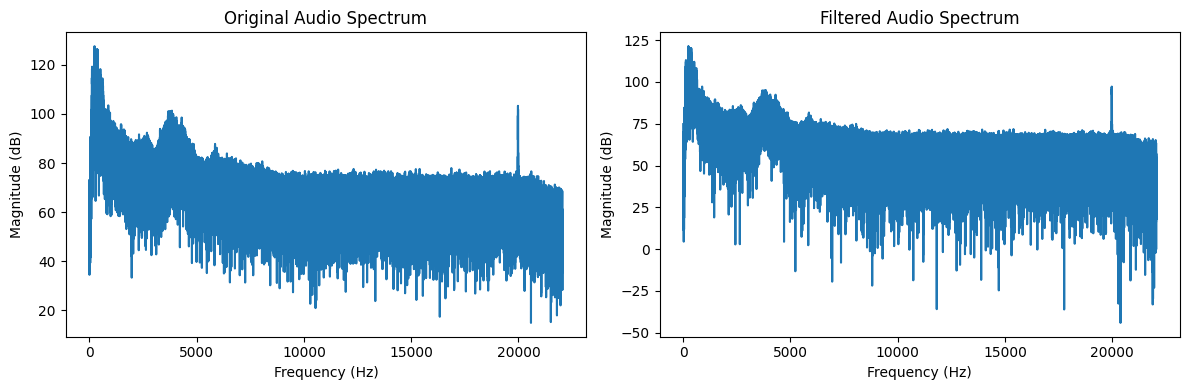


1. Record audio
2. Upload audio
3. Apply noise reduction
4.Plot spectrum 
5. Play original audio
6. Play filtered audio
7. Exit
Playing audio...

1. Record audio
2. Upload audio
3. Apply noise reduction
4.Plot spectrum 
5. Play original audio
6. Play filtered audio
7. Exit

1. Record audio
2. Upload audio
3. Apply noise reduction
4.Plot spectrum 
5. Play original audio
6. Play filtered audio
7. Exit
Exiting...


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft
import sounddevice as sd
from pydub import AudioSegment
from pydub.playback import play

def record_audio(duration=10, filename='recorded_audio.wav', fs=44100):
    print("Recording audio...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float64')
    sd.wait()
    wavfile.write(filename, fs, (audio * (2 ** 15)).astype(np.int16))
    print(f"Audio recorded and saved as {filename}")

def load_audio(filename):
    print("Loading audio...")
    audio = AudioSegment.from_file(filename)
    return np.array(audio.get_array_of_samples()), audio.frame_rate

def plot_spectrum_comparison(original_samples, filtered_samples, fs):
    print("Plotting spectrum comparison...")
    plt.figure(figsize=(12, 4))

    # Original audio spectrum
    plt.subplot(1, 2, 1)
    freqs_orig, spectrum_orig = get_spectrum(original_samples, fs)
    plt.plot(freqs_orig[:len(freqs_orig)//2], 20 * np.log10(spectrum_orig[:len(freqs_orig)//2] + 1e-6))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.title('Original Audio Spectrum')

    # Filtered audio spectrum
    plt.subplot(1, 2, 2)
    freqs_filt, spectrum_filt = get_spectrum(filtered_samples, fs)
    plt.plot(freqs_filt[:len(freqs_filt)//2], 20 * np.log10(spectrum_filt[:len(freqs_filt)//2] + 1e-6))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.title('Filtered Audio Spectrum')

    plt.tight_layout()
    plt.show()

def get_spectrum(samples, fs):
    freqs = np.fft.fftfreq(len(samples), 1/fs)
    spectrum = np.abs(fft(samples))
    return freqs, spectrum

def spectral_subtraction(samples, noise_samples, alpha=1):
    print("Applying spectral subtraction...")
    noise_spectrum = np.abs(fft(noise_samples))
    audio_spectrum = np.abs(fft(samples))
    audio_spectrum -= alpha * noise_spectrum
    filtered_samples = np.real(ifft(audio_spectrum))
    return filtered_samples.astype(np.int16)

def play_audio(samples, fs):
    print("Playing audio...")
    sd.play(samples, samplerate=fs)
    sd.wait()

def main():
    while True:
        print("\n1. Record audio\n2. Upload audio\n3. Apply noise reduction\n4.Plot spectrum \n5. Play original audio\n6. Play filtered audio\n7. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            record_audio()
        elif choice == '2':
            filename = input("Enter the audio file path: ")
            samples, fs = load_audio(filename)
        elif choice == '3':
            if 'samples' not in locals():
                print("Please load audio before applying noise reduction.")
                continue
            noise_file = input("Enter the noise audio file path: ")
            noise_samples, _ = load_audio(noise_file)
            alpha = float(input("Enter alpha value (0-1): "))
            filtered_samples = spectral_subtraction(samples, noise_samples, alpha)
            #plot_spectrum_comparison(samples, filtered_samples, fs)
        elif choice == '4':
              plot_spectrum_comparison(samples, filtered_samples,fs)

        elif choice == '5':
            play_audio(samples, fs)
        elif choice == '6':
            filtered_audio = AudioSegment(
                data=filtered_samples.tobytes(), 
                sample_width=2,  # Assuming 16-bit depth
                channels=1,      # Mono audio
                frame_rate=fs
            )
            play(filtered_audio)
        elif choice == '7':
            print("Exiting...")
            break
        else:
            print("Invalid choice. Please enter a number between 1 and 7.")

if __name__ == "__main__":
    main()


In [23]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
pip install pydub


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Conversion of .MP3 format to .WAV format


In [7]:
import os
from os import path
from pydub import AudioSegment

# Set the environment variable to point to FFmpeg
FFMPEG_PATH = "C:/Users/Haseeb Raza/Desktop/Digital_processing/ffmpeg.exe"  # Path to ffmpeg executable
os.environ["AUDIODUB_CONVERSION_COMMAND"] = FFMPEG_PATH

# files
src = "C:/Users/Haseeb Raza/Desktop/Digital_processing/The Illest Villains.mp3"
dst = "test.wav"

# convert mp3 to wav
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")


<_io.BufferedRandom name='test.wav'>

Using Spectrum Subtraction



1. Record audio
2. Upload audio
3. Apply noise reduction
4. Plot spectrum
5. Play original audio
6. Play filtered audio
7. Exit


Loading audio...

1. Record audio
2. Upload audio
3. Apply noise reduction
4. Plot spectrum
5. Play original audio
6. Play filtered audio
7. Exit
Loading audio...
Applying spectral subtraction...
[127.96668  117.04524   96.897545 ...  80.15645   96.897545 117.04524 ]
[127 117  96 ...  80  96 117]

1. Record audio
2. Upload audio
3. Apply noise reduction
4. Plot spectrum
5. Play original audio
6. Play filtered audio
7. Exit
Plotting spectrum comparison...


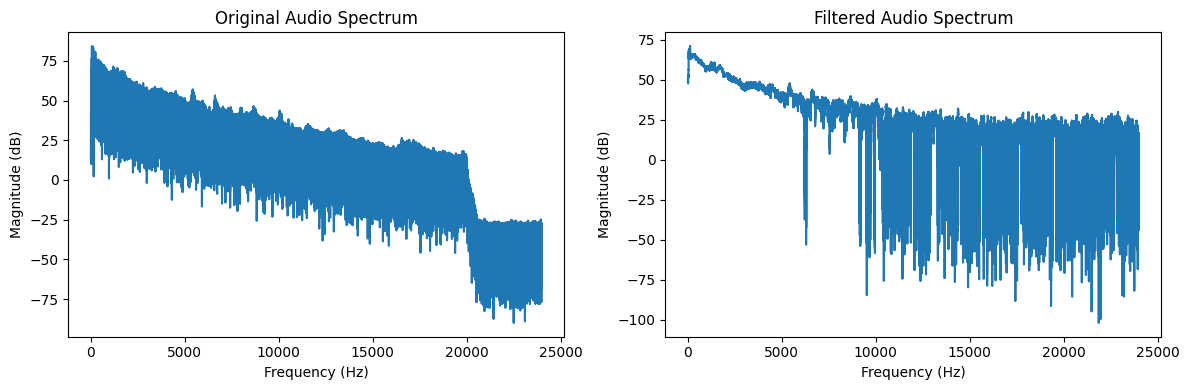


1. Record audio
2. Upload audio
3. Apply noise reduction
4. Plot spectrum
5. Play original audio
6. Play filtered audio
7. Exit
Playing audio...


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft
import sounddevice as sd
import subprocess
import os
from os import path
import librosa
from pydub import AudioSegment
from pydub.exceptions import CouldntDecodeError

FFMPEG_PATH = "C:/Users/Haseeb Raza/Desktop/Digital_processing/ffmpeg.exe"  # Path to ffmpeg executable

def record_audio(duration=10, filename='recorded_audio.wav', fs=44100):
    print("Recording audio...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float64')
    sd.wait()
    wavfile.write(filename, fs, (audio * (2 ** 15)).astype(np.int16))
    print(f"Audio recorded and saved as {filename}")

def load_audio(filename, max_duration=300, max_size_mb=40):
    print("Loading audio...")
    try:
        # Get the size of the audio file
        file_size_bytes = os.path.getsize(filename)
        file_size_mb = file_size_bytes / (1024 ** 2)  # Convert bytes to MB

        # Check if file size exceeds the limit
        if file_size_mb > max_size_mb:
            print(f"File size exceeds {max_size_mb} MB limit.")
            return None, None

        y, sr = librosa.load(filename, sr=None, mono=True)
        duration = librosa.get_duration(y=y, sr=sr)

        # Checking duration
        if duration > max_duration:
            print(f"Audio duration exceeds {max_duration} seconds limit.")
            return None, None

        return y, sr

    except CouldntDecodeError as e:
        print(f"Error loading audio: {e}")
        return None, None
    except FileNotFoundError as e:
        print(f"File not found: {e}")
        return None, None
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None, None
    
def plot_spectrum_comparison(original_samples, filtered_samples, fs):
    print("Plotting spectrum comparison...")
    plt.figure(figsize=(12, 4))

    # Original audio spectrum
    plt.subplot(1, 2, 1)
    freqs_orig, spectrum_orig = get_spectrum(original_samples, fs)
    plt.plot(freqs_orig[:len(freqs_orig)//2], 20 * np.log10(spectrum_orig[:len(freqs_orig)//2] + 1e-6))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.title('Original Audio Spectrum')

    # Filtered audio spectrum
    plt.subplot(1, 2, 2)
    freqs_filt, spectrum_filt = get_spectrum(filtered_samples, fs)
    plt.plot(freqs_filt[:len(freqs_filt)//2], 20 * np.log10(spectrum_filt[:len(freqs_filt)//2] + 1e-6))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.title('Filtered Audio Spectrum')

    plt.tight_layout()
    plt.show()

def get_spectrum(samples, fs):
    freqs = np.fft.fftfreq(len(samples), 1/fs)
    spectrum = np.abs(fft(samples))
    return freqs, spectrum

def spectral_subtraction(samples, noise_samples, alpha=1):
    print("Applying spectral subtraction...")
    if noise_samples is None:
        print("Noise samples are not available.")
        return samples
    
    # Ensure the lengths match
    if len(noise_samples) != len(samples):
        print("Warning: Noise samples length does not match the length of the input samples.")
        return samples
    
    noise_spectrum = np.abs(fft(noise_samples))
    audio_spectrum = np.abs(fft(samples))
    audio_spectrum -= alpha * noise_spectrum
    filtered_samples = np.real(ifft(audio_spectrum))
    print(filtered_samples)
    return filtered_samples.astype(np.int16)

def play_audio(samples, fs):
    print("Playing audio...")
    sd.play(samples, samplerate=fs)
    sd.wait()
def play_audio1(filtered_sample, fs):
    print("Playing audio...")
    sd.play(filtered_sample, samplerate=fs)
    sd.wait()


def main():
    while True:
        print("\n1. Record audio\n2. Upload audio\n3. Apply noise reduction\n4. Plot spectrum\n5. Play original audio\n6. Play filtered audio\n7. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            record_audio()
        elif choice == '2':
            filename = input("Enter the audio file path: ")
            samples, fs = load_audio(filename)
        elif choice == '3':
            if 'samples' not in locals():
                print("Please load audio before applying noise reduction.")
                continue
            noise_file = input("Enter the noise audio file path: ")
            noise_samples, _ = load_audio(noise_file)
            alpha = float(input("Enter alpha value (0-1): "))
            filtered_samples = spectral_subtraction(samples, noise_samples, alpha)
            print(filtered_samples)
        elif choice == '4':
            plot_spectrum_comparison(samples, filtered_samples, fs)
        elif choice == '5':
            play_audio(samples, fs)
        elif choice == '6':
            play_audio1(filtered_samples, fs)
        elif choice == '7':
            print("Exiting...")
            break
        else:
            print("Invalid choice. Please enter a number between 1 and 7.")

if __name__ == "__main__":
    main()


Using Noise Reduction library


1. Record audio
2. Upload audio
3. Apply noise reduction
4. Plot spectrum
5. Play original audio
6. Play filtered audio
7. Exit
Loading audio...

1. Record audio
2. Upload audio
3. Apply noise reduction
4. Plot spectrum
5. Play original audio
6. Play filtered audio
7. Exit
Loading audio...

1. Record audio
2. Upload audio
3. Apply noise reduction
4. Plot spectrum
5. Play original audio
6. Play filtered audio
7. Exit
Plotting spectrum comparison...


c:\Users\Haseeb Raza\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:7944: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


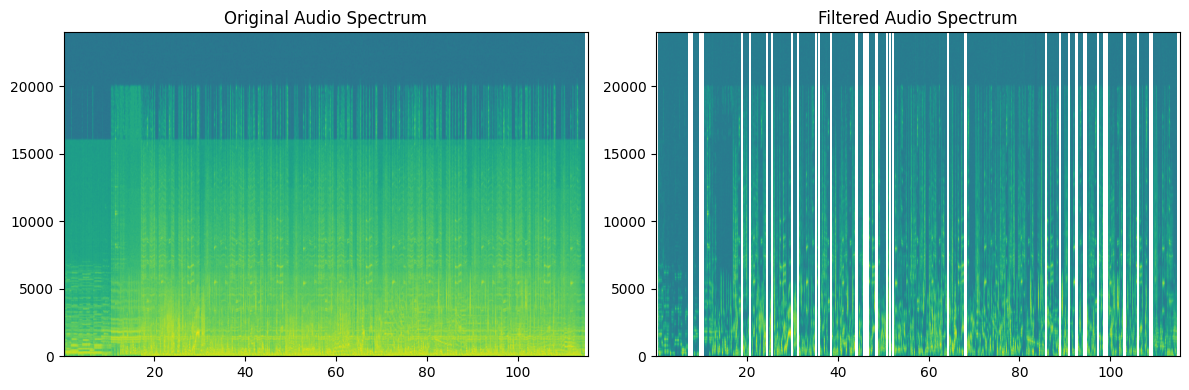


1. Record audio
2. Upload audio
3. Apply noise reduction
4. Plot spectrum
5. Play original audio
6. Play filtered audio
7. Exit

1. Record audio
2. Upload audio
3. Apply noise reduction
4. Plot spectrum
5. Play original audio
6. Play filtered audio
7. Exit

1. Record audio
2. Upload audio
3. Apply noise reduction
4. Plot spectrum
5. Play original audio
6. Play filtered audio
7. Exit
Recording audio...
Audio recorded.

1. Record audio
2. Upload audio
3. Apply noise reduction
4. Plot spectrum
5. Play original audio
6. Play filtered audio
7. Exit
Exiting...


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import librosa
import noisereduce as nr
import os

# Update the ffmpeg path
FFMPEG_PATH = "C:/Users/Haseeb Raza/Desktop/Digital_processing/ffmpeg.exe"

# Set the environment variable to include the ffmpeg path
os.environ['PATH'] += os.pathsep + os.path.dirname(FFMPEG_PATH)

def record_audio(duration=10, fs=44100):
    print("Recording audio...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float64')
    sd.wait()
    print("Audio recorded.")
    return audio.flatten(), fs

def load_audio(filename):
    print("Loading audio...")
    try:
        y, sr = librosa.load(filename, sr=None, mono=True)
        return y, sr
    except Exception as e:
        print(f"Error loading audio: {e}")
        return None, None
    
def plot_spectrum_comparison(original_samples, filtered_samples, fs):
    print("Plotting spectrum comparison...")
    plt.figure(figsize=(12, 4))

    # Original audio spectrum
    plt.subplot(1, 2, 1)
    plt.specgram(original_samples, Fs=fs, NFFT=1024, noverlap=512)
    plt.title('Original Audio Spectrum')

    # Filtered audio spectrum
    plt.subplot(1, 2, 2)
    plt.specgram(filtered_samples, Fs=fs, NFFT=1024, noverlap=512)
    plt.title('Filtered Audio Spectrum')

    plt.tight_layout()
    plt.show()

def main():
    while True:
        print("\n1. Record audio\n2. Upload audio\n3. Apply noise reduction\n4. Plot spectrum\n5. Play original audio\n6. Play filtered audio\n7. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            samples, fs = record_audio()
        elif choice == '2':
            filename = input("Enter the audio file path: ")
            samples, fs = load_audio(filename)
        elif choice == '3':
            if 'samples' not in locals():
                print("Please record or upload audio before applying noise reduction.")
                continue
            noise_file = input("Enter the noise audio file path: ")
            noise_samples, _ = load_audio(noise_file)
            if noise_samples is None:
                print("Error loading noise file. Please check the file path.")
                continue
            # Apply noise reduction
            reduced_noise = nr.reduce_noise(y=samples, sr=fs)
            # Cast the result to int16 for sound playback
            filtered_samples = (reduced_noise * np.iinfo(np.int16).max).astype(np.int16)
        elif choice == '4':
            if 'samples' not in locals() or 'filtered_samples' not in locals():
                print("Please record or upload audio and apply noise reduction first.")
                continue
            plot_spectrum_comparison(samples, filtered_samples, fs)
        elif choice == '5':
            if 'samples' not in locals():
                print("Please record or upload audio first.")
                continue
            sd.play(samples, samplerate=fs)
            sd.wait()
        elif choice == '6':
            if 'filtered_samples' not in locals():
                print("Please apply noise reduction first.")
                continue
            sd.play(filtered_samples, samplerate=fs)
            sd.wait()
        elif choice == '7':
            print("Exiting...")
            break
        else:
            print("Invalid choice. Please enter a number between 1 and 7.")

if __name__ == "__main__":
    main()
